In [8]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Import citipy
from citipy import citipy

# Import api + requests

import requests
from config import weather_api_key 

# Import the time library and the datetime module from the datetime library 

import time
from datetime import datetime

In [9]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

lat_lngs

In [11]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [12]:
# Use the print() function to display the latitude and longitude combinations.

for coordinate in coordinates:
    
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

thompson ca
kavaratti in
rikitea pf
mahebourg mu
punta arenas cl
oranjemund na
atuona pf
lebu cl
maceio br
atuona pf
bengkulu id
beaufort lu
vaini to
ushuaia ar
rikitea pf
erenhot cn
megion ru
jarjis tn
mys shmidta ru
sitka us
dikson ru
nikolskoye ru
jamestown sh
mae ramat th
newport us
tessalit ml
fare pf
leningradskiy ru
tsihombe mg
pevek ru
baoying cn
tiksi ru
victoria sc
chokurdakh ru
vaini to
qaanaaq gl
hobart au
belushya guba ru
chokurdakh ru
westport nz
diamantina br
vaini to
gushikawa jp
kapaa us
taolanaro mg
rungata ki
kangaba ml
samarai pg
longyearbyen sj
cape town za
hobart au
tsihombe mg
tasiilaq gl
tiksi ru
port lincoln au
taolanaro mg
barentsburg sj
thompson ca
rikitea pf
hithadhoo mv
rikitea pf
hasaki jp
punta arenas cl
vaini to
bethel us
constantine dz
hermanus za
pimentel pe
arraial do cabo br
bethel us
illoqqortoormiut gl
nalbari in
kruisfontein za
yellowknife ca
salvador br
norman wells ca
lazaro cardenas mx
saskylakh ru
nikolskoye ru
domoni km
henties bay na
punta a

taolanaro mg
tomatlan mx
ushuaia ar
esperance au
nikolskoye ru
sao filipe cv
evensk ru
calama cl
lavrentiya ru
mentok id
georgetown sh
rikitea pf
east london za
chaa-khol ru
tuktoyaktuk ca
faanui pf
carauari br
khatanga ru
hilo us
faya td
azimur ma
ushuaia ar
punta arenas cl
kodiak us
olafsvik is
punta arenas cl
constitucion mx
barrow us
ribeira grande pt
kenai us
nova venecia br
porto novo cv
cape town za
bathsheba bb
butaritari ki
prince rupert ca
kapaa us
saint-philippe re
sabha ly
meadow lake ca
sobolevo ru
barrow us
wanning cn
ilulissat gl
busselton au
kazalinsk kz
provideniya ru
mar del plata ar
hobart au
chicama pe
taolanaro mg
katobu id
upernavik gl
qaanaaq gl
sao raimundo nonato br
aksarka ru
nikolskoye ru
lorengau pg
ribeira grande pt
balkhash kz
cape town za
iquitos pe
bengkulu id
rikitea pf
flinders au
san patricio mx
farmington us
banda aceh id
tual id
barrow us
ushuaia ar
barrow us
bethel us
flinders au
taolanaro mg
perkata hu
requena pe
illoqqortoormiut gl
rikitea pf
sal

In [13]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

584

In [14]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [16]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [17]:
# Loop through all the cities in our list.

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | kavaratti
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | mahebourg
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | oranjemund
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | maceio
Processing Record 10 of Set 1 | bengkulu
Processing Record 11 of Set 1 | beaufort
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | erenhot
Processing Record 15 of Set 1 | megion
Processing Record 16 of Set 1 | jarjis
City not found. Skipping...
Processing Record 17 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 18 of Set 1 | sitka
Processing Record 19 of Set 1 | dikson
Processing Record 20 of Set 1 | nikolskoye
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Set 1 | mae ramat
Processing Record 23 of Set 1 | newport
Processing Record 2

Processing Record 40 of Set 4 | butaritari
Processing Record 41 of Set 4 | daguma
Processing Record 42 of Set 4 | saint-augustin
Processing Record 43 of Set 4 | torbay
Processing Record 44 of Set 4 | ancud
Processing Record 45 of Set 4 | saldanha
Processing Record 46 of Set 4 | sao jose da coroa grande
Processing Record 47 of Set 4 | gimli
Processing Record 48 of Set 4 | sorvag
City not found. Skipping...
Processing Record 49 of Set 4 | burgersdorp
Processing Record 50 of Set 4 | rawannawi
City not found. Skipping...
Processing Record 1 of Set 5 | catuday
Processing Record 2 of Set 5 | cayenne
Processing Record 3 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 4 of Set 5 | la rioja
Processing Record 5 of Set 5 | isangel
Processing Record 6 of Set 5 | souillac
Processing Record 7 of Set 5 | mlonggo
Processing Record 8 of Set 5 | arlit
Processing Record 9 of Set 5 | mbandaka
Processing Record 10 of Set 5 | matamoros
Processing Record 11 of Set 5 | amderma
City not foun

Processing Record 26 of Set 8 | kozulka
Processing Record 27 of Set 8 | awbari
Processing Record 28 of Set 8 | maragogi
Processing Record 29 of Set 8 | klyuchi
Processing Record 30 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 31 of Set 8 | sibenik
Processing Record 32 of Set 8 | acarau
Processing Record 33 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 34 of Set 8 | mergui
City not found. Skipping...
Processing Record 35 of Set 8 | praia da vitoria
Processing Record 36 of Set 8 | ambilobe
Processing Record 37 of Set 8 | erzin
Processing Record 38 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 39 of Set 8 | the valley
Processing Record 40 of Set 8 | angra
City not found. Skipping...
Processing Record 41 of Set 8 | emba
Processing Record 42 of Set 8 | port hardy
Processing Record 43 of Set 8 | anadyr
Processing Record 44 of Set 8 | tomatlan
Processing Record 45 of Set 8 | sao filipe
Processing Record 46 of Set 8 | evensk
Process

Processing Record 10 of Set 12 | jieshi
Processing Record 11 of Set 12 | celestun
Processing Record 12 of Set 12 | san cristobal
Processing Record 13 of Set 12 | yafran
Processing Record 14 of Set 12 | saint-pierre
Processing Record 15 of Set 12 | shirokiy
Processing Record 16 of Set 12 | tutoia
Processing Record 17 of Set 12 | vega de alatorre
Processing Record 18 of Set 12 | tongren
Processing Record 19 of Set 12 | kitui
Processing Record 20 of Set 12 | jefferson city
Processing Record 21 of Set 12 | riyadh
Processing Record 22 of Set 12 | sao luis do quitunde
Processing Record 23 of Set 12 | saint peter
Processing Record 24 of Set 12 | nuevo progreso
Processing Record 25 of Set 12 | kuche
City not found. Skipping...
Processing Record 26 of Set 12 | puerto escondido
Processing Record 27 of Set 12 | pyaozerskiy
Processing Record 28 of Set 12 | jahazpur
Processing Record 29 of Set 12 | takoradi
Processing Record 30 of Set 12 | hashtgerd
Processing Record 31 of Set 12 | ozernovskiy
Proc

In [19]:
# convert the array of dictionaries to a pandas dataframe

city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.7435,-97.8558,62.76,59,20,8.05,CA,2022-08-11 14:51:12
1,Kavaratti,10.5669,72.6420,81.61,81,34,19.98,IN,2022-08-11 14:51:12
2,Rikitea,-23.1203,-134.9692,72.70,71,70,22.10,PF,2022-08-11 14:51:13
3,Mahebourg,-20.4081,57.7000,69.26,88,75,18.41,MU,2022-08-11 14:51:13
4,Punta Arenas,-53.1500,-70.9167,33.82,86,20,9.22,CL,2022-08-11 14:51:14
5,Oranjemund,-28.5500,16.4333,58.71,80,30,12.62,NA,2022-08-11 14:51:14
6,Atuona,-9.8000,-139.0333,75.87,79,11,21.30,PF,2022-08-11 14:51:14
7,Lebu,-37.6167,-73.6500,50.25,66,87,0.45,CL,2022-08-11 14:51:15
8,Maceio,-9.6658,-35.7353,81.84,74,75,6.91,BR,2022-08-11 14:48:10
9,Bengkulu,-3.8004,102.2655,77.58,89,22,3.60,ID,2022-08-11 14:51:15


In [20]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", 
                   "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [21]:
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thompson,CA,2022-08-11 14:51:12,55.7435,-97.8558,62.76,59,20,8.05
1,Kavaratti,IN,2022-08-11 14:51:12,10.5669,72.6420,81.61,81,34,19.98
2,Rikitea,PF,2022-08-11 14:51:13,-23.1203,-134.9692,72.70,71,70,22.10
3,Mahebourg,MU,2022-08-11 14:51:13,-20.4081,57.7000,69.26,88,75,18.41
4,Punta Arenas,CL,2022-08-11 14:51:14,-53.1500,-70.9167,33.82,86,20,9.22


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

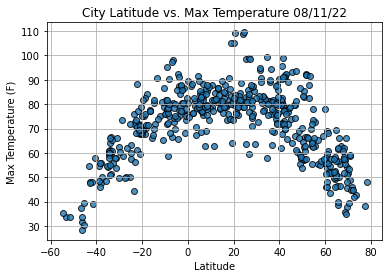

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

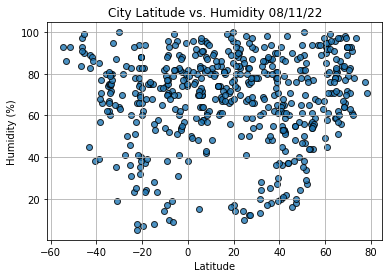

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

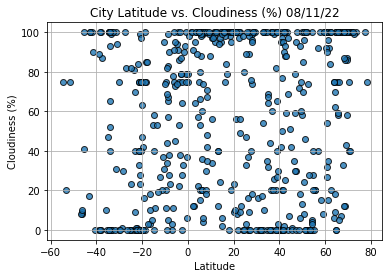

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

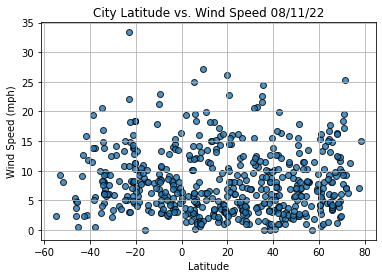

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [28]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [31]:
index13 = city_data_df.loc[13]
index13

City                      Erenhot
Country                        CN
Date          2022-08-11 14:51:17
Lat                       43.6475
Lng                      111.9767
Max Temp                    76.98
Humidity                       37
Cloudiness                     97
Wind Speed                   16.4
Name: 13, dtype: object

In [30]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4      False
       ...  
525     True
526     True
527     True
528    False
529     True
Name: Lat, Length: 530, dtype: bool

In [32]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thompson,CA,2022-08-11 14:51:12,55.7435,-97.8558,62.76,59,20,8.05
1,Kavaratti,IN,2022-08-11 14:51:12,10.5669,72.6420,81.61,81,34,19.98
10,Beaufort,MY,2022-08-11 14:51:16,5.3473,115.7455,77.54,90,53,2.86
13,Erenhot,CN,2022-08-11 14:51:17,43.6475,111.9767,76.98,37,97,16.40
14,Megion,RU,2022-08-11 14:51:17,61.0296,76.1136,60.82,61,35,2.68


In [33]:
# Create Northern and Southern Hemisphere DataFrames.

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

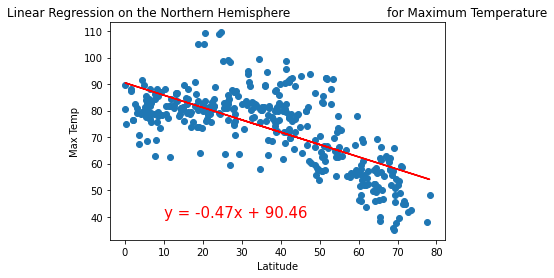

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

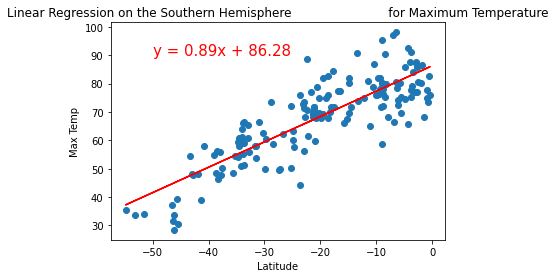

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

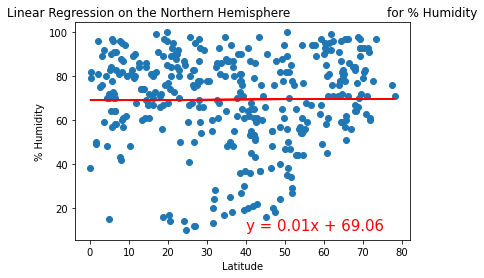

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

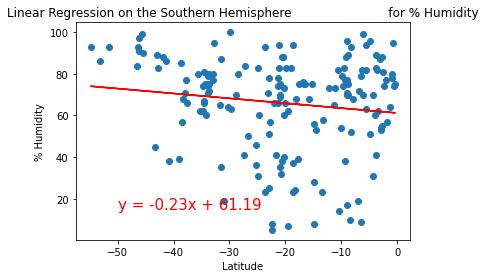

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

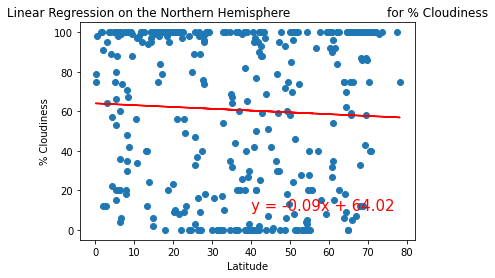

In [39]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

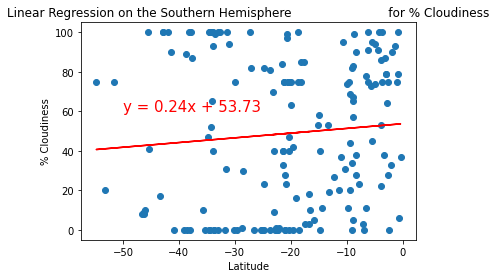

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

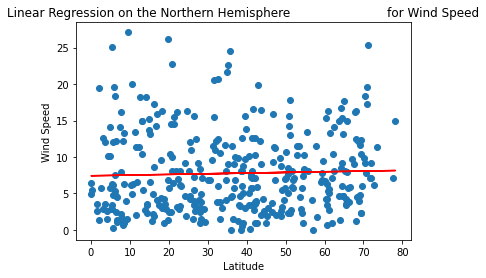

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

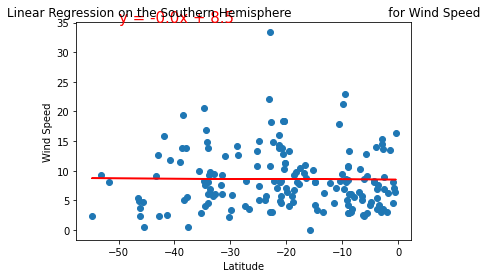

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))